In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd

import json
import glob
import os
import re

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
base = "../exp/"
paths = glob.glob(base + "rank/*.json") + glob.glob(base + "rank_live/*.json")
data = [json.load(open(path)) for path in paths]

In [3]:
queries = pd.DataFrame.from_records([{
    **algo,
    'potential': run['potential'],
    'graph': run['args'][1],
    'metric': 'predicted' if run['program'] in ['predicted_queries', 'predicted_queries_no_topo'] else run['args'][3],
    'topo': 'no_topo' not in run['program']
} for run in data for algo in run['algo_runs']]).query('topo')

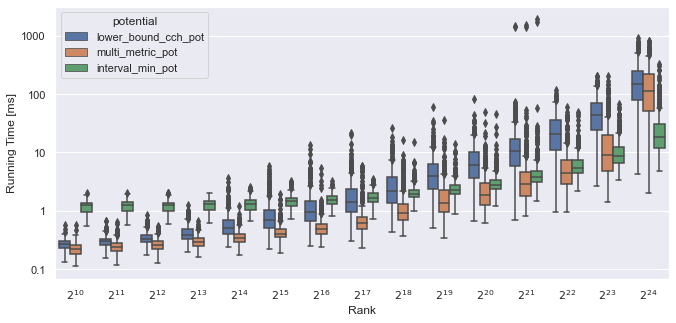

In [17]:
plt.figure(figsize=(11,5))
g = sns.boxplot(data=queries.loc[lambda x: x['graph'].str.contains('ptv')].query('metric == "live_data" & rank >= 10'), x='rank', y='running_time_ms', hue='potential')
g.set_yscale('log')
g.set_ylabel('Running Time [ms]')
g.set_xlabel('Rank')
g.yaxis.set_major_locator(mpl.ticker.LogLocator(base=10,numticks=10))
g.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda val, pos: f"{val if val < 1.0 else int(val)}"))
g.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda val, pos: f"$2^{{{val+10}}}$"))

In [11]:
queries.loc[lambda x: x['graph'].str.contains('ptv')].query('metric == "live_data" & rank > 10').groupby('rank')['result'].describe() / (1000 * 3600)

,count,mean,std,min,25%,50%,75%,max
rank,,,,,,,,
11,0.00,0.18,0.09,0.08,0.14,0.16,0.20,1.20
12,0.00,0.24,0.08,0.11,0.18,0.21,0.27,0.63
13,0.00,0.32,0.11,0.18,0.25,0.29,0.35,1.16
14,0.00,0.43,0.14,0.20,0.33,0.39,0.48,1.40
15,0.00,0.57,0.24,0.28,0.43,0.51,0.64,3.01
16,0.00,0.78,0.54,0.36,0.58,0.67,0.87,10.50
17,0.00,0.97,0.32,0.47,0.77,0.87,1.10,2.95
18,0.00,1.28,0.64,0.71,0.99,1.16,1.39,11.87
19,0.00,1.72,0.75,0.91,1.35,1.55,1.87,12.14


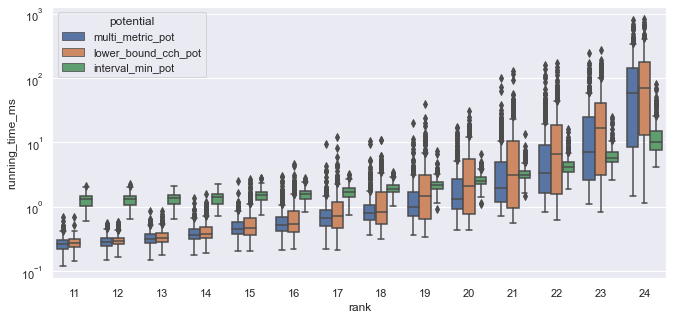

In [5]:
plt.figure(figsize=(11,5))
g = sns.boxplot(data=queries.loc[lambda x: x['graph'].str.contains('ptv')].query('metric == "predicted" & rank > 10'), x='rank', y='running_time_ms', hue='potential')
g.set_yscale('log')

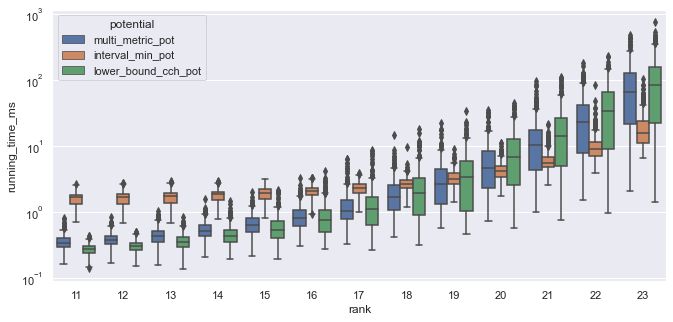

In [6]:
plt.figure(figsize=(11,5))
g = sns.boxplot(data=queries.loc[lambda x: x['graph'].str.contains('osm')].query('metric == "predicted" & rank > 10'), x='rank', y='running_time_ms', hue='potential')
g.set_yscale('log')

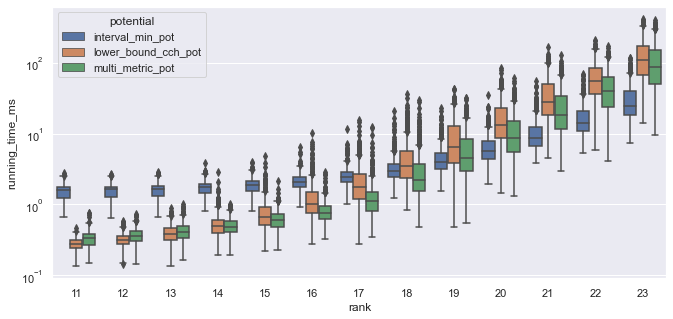

In [7]:
plt.figure(figsize=(11,5))
g = sns.boxplot(data=queries.loc[lambda x: x['graph'].str.contains('osm')].query('metric == "heavy_live_data" & rank > 10'), x='rank', y='running_time_ms', hue='potential')
g.set_yscale('log')

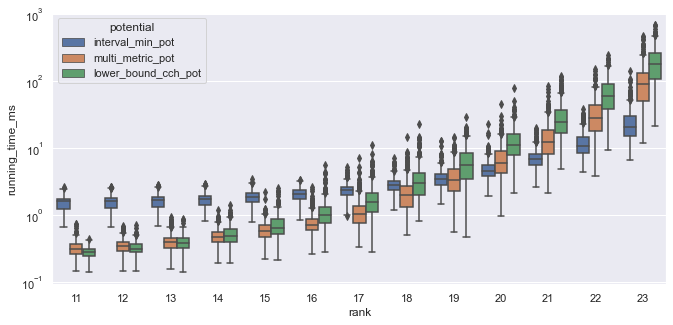

In [8]:
plt.figure(figsize=(11,5))
g = sns.boxplot(data=queries.loc[lambda x: x['graph'].str.contains('osm')].query('metric == "lite_live_data" & rank > 10'), x='rank', y='running_time_ms', hue='potential')
g.set_yscale('log')